In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import os, re, sys
sys.path.append("../")

import torch
from torch.utils.data import Dataset, DataLoader
import metagnn as mg

from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

# FFT

In [534]:
# %%timeit
sim_mtx = compute_similarity_matrix(enc_seq[window[0]:window[1]])
frobenius_norm(sim_mtx)

tensor(0.9528)

In [361]:
# %%timeit
frobenius_norm_cross_correlation(enc_seq[window[0]:window[1]])

tensor([1.1866])

tensor(2.8784)


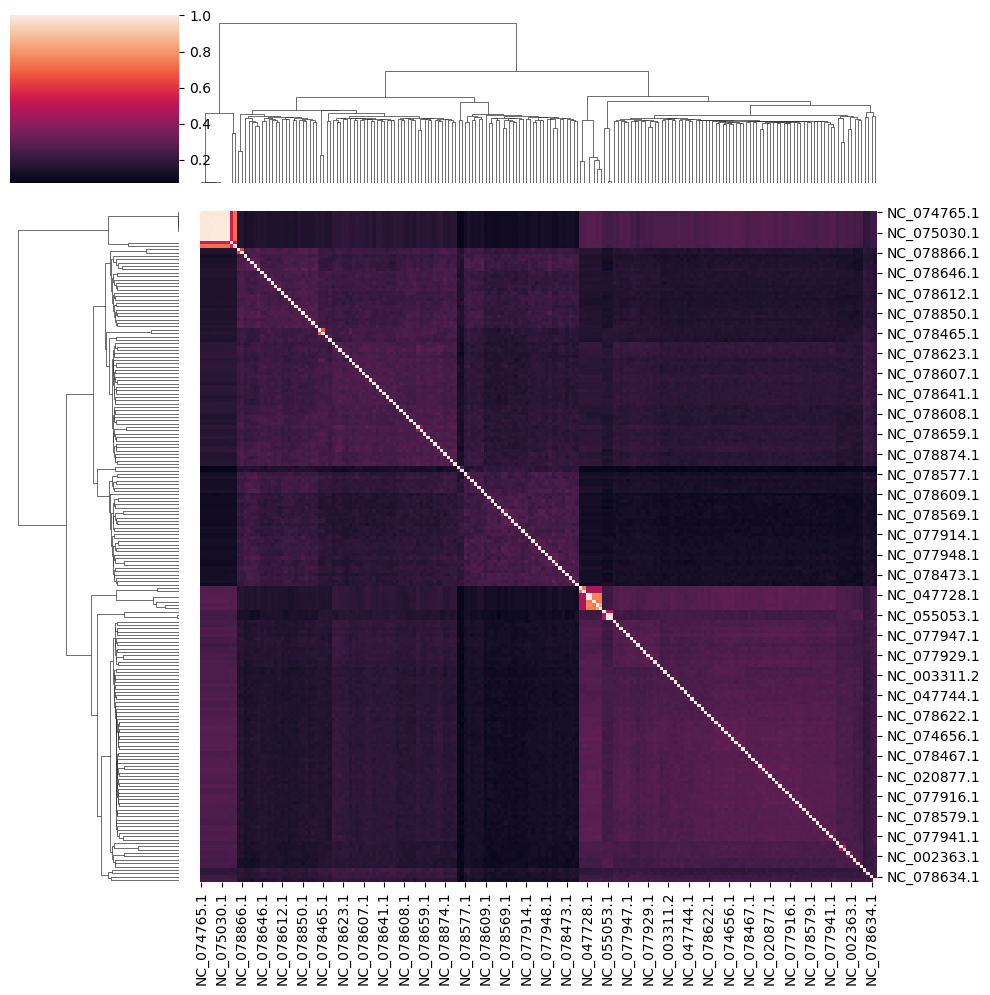

In [535]:
window = (100,300)
names = list(fasta_dict.keys())[window[0]:window[1]]
names = [re.match(r"^\S+", name).group() for name in names]
sim_mtx = compute_similarity_matrix(enc_seq[window[0]:window[1]])
print(frobenius_norm(sim_mtx))
view_data = pd.DataFrame(sim_mtx, index=names, columns=names)
sns.clustermap(data=view_data)
plt.tight_layout()

tensor(3.8667)


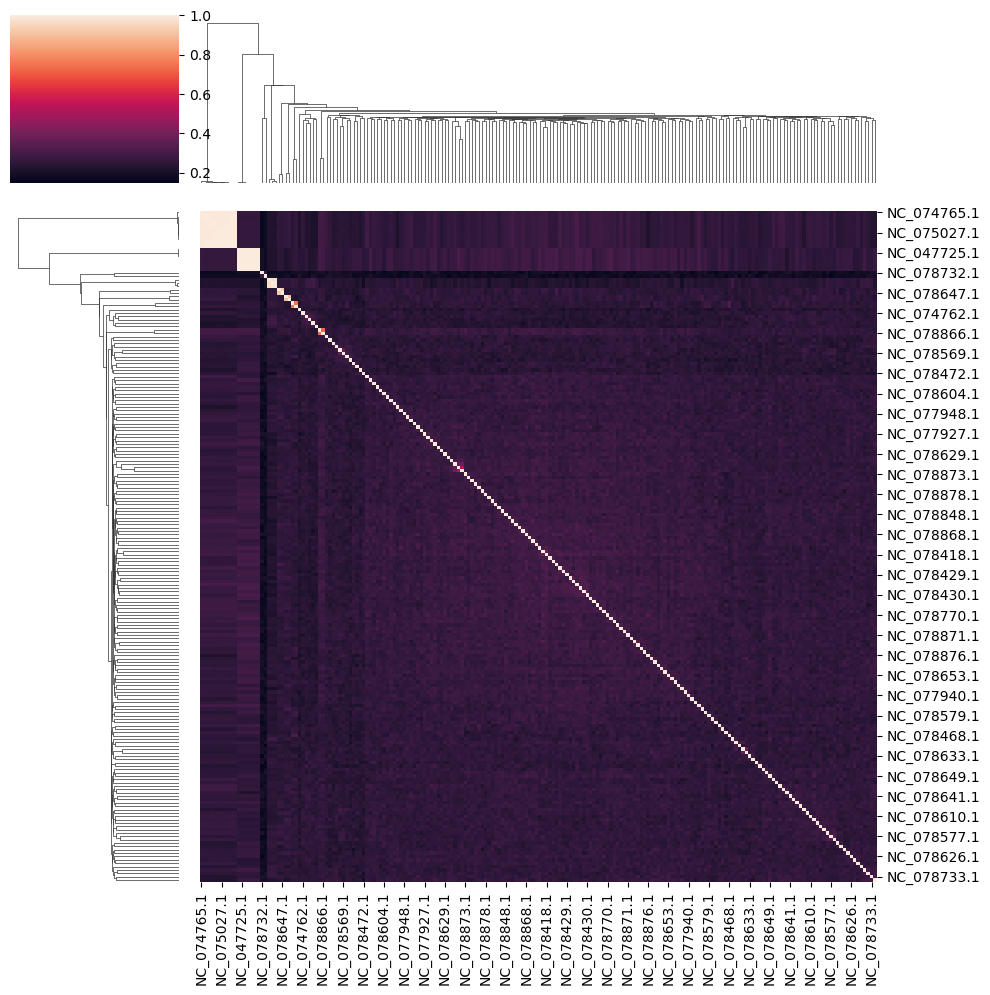

In [487]:
window = (100,300)
names = list(fasta_dict.keys())[window[0]:window[1]]
names = [re.match(r"^\S+", name).group() for name in names]
sim_mtx = compute_similarity_matrix(enc_seq[window[0]:window[1]])
print(frobenius_norm(sim_mtx))
view_data = pd.DataFrame(sim_mtx, index=names, columns=names)
sns.clustermap(data=view_data)
plt.tight_layout()

In [495]:
dataset.headers[:10]

['NC_007929.1 Ligilactobacillus salivarius UCC118, complete sequence',
 'NC_026314.1 Rabovirus A1 isolate Berlin/Jan2011/0572, complete genome',
 'NZ_CP045110.1 Acinetobacter baumannii strain ATCC 19606 chromosome, complete genome',
 'NZ_CP110845.1 Streptomyces sp. Je 1-4 4N24_ara chromosome, complete genome',
 'NG_242639.1 Salmonella phage SSU5 dfrA51 gene for trimethoprim-resistant dihydrofolate reductase DfrA51, complete CDS',
 'NG_242638.1 Klebsiella phage pJN2-26 Klebsiella pneumoniae ST4656 isolate JN2-26 dfrA50 gene for trimethoprim-resistant dihydrofolate reductase DfrA50, complete CDS',
 'NG_242637.1 Klebsiella phage ST13-OXA48phi12.3 dfrA50 gene for trimethoprim-resistant dihydrofolate reductase DfrA50, complete CDS',
 'NZ_CP008698.1 Bacillus subtilis subsp. subtilis str. AG1839 chromosome, complete genome',
 'NZ_CP007800.1 Bacillus subtilis subsp. subtilis str. JH642 substr. AG174 strain JH642 chromosome, complete genome',
 'NC_001803.1 Respiratory syncytial virus, complete 

tensor(1.3812)


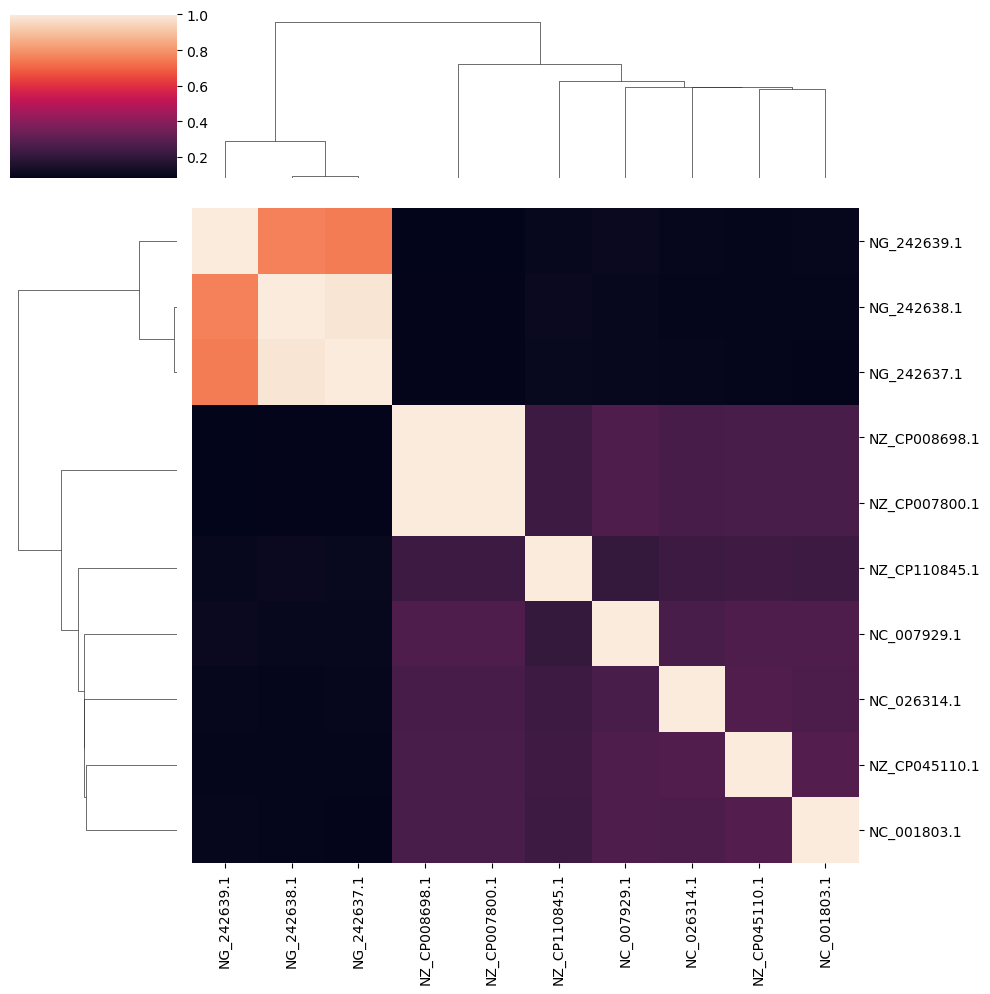

In [496]:
window = (0,10)
names = list(fasta_dict.keys())[window[0]:window[1]]
names = [re.match(r"^\S+", name).group() for name in names]
sim_mtx = compute_similarity_matrix(enc_seq[window[0]:window[1]])
print(frobenius_norm(sim_mtx))
view_data = pd.DataFrame(sim_mtx, index=names, columns=names)
sns.clustermap(data=view_data)
plt.tight_layout()

tensor(1.4290)


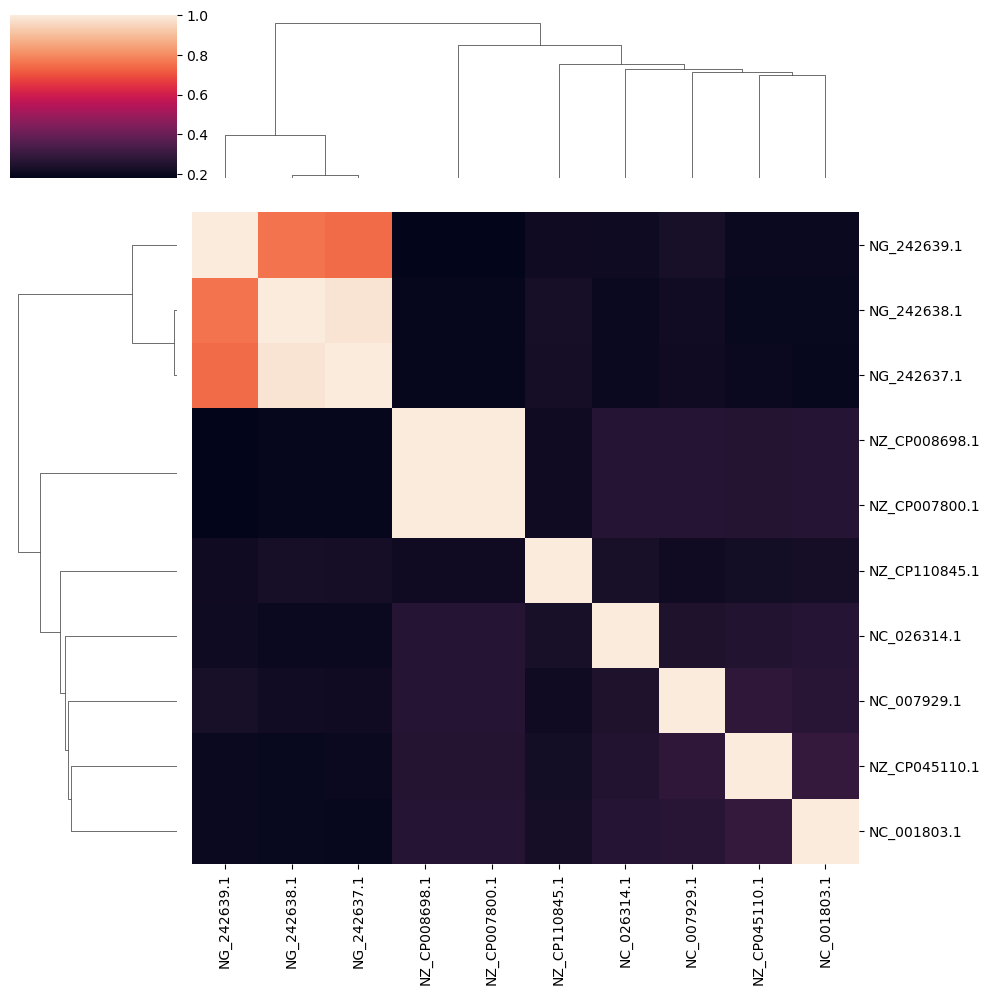

In [488]:
window = (0,10)
names = list(fasta_dict.keys())[window[0]:window[1]]
names = [re.match(r"^\S+", name).group() for name in names]
sim_mtx = compute_similarity_matrix(enc_seq[window[0]:window[1]])
print(frobenius_norm(sim_mtx))
view_data = pd.DataFrame(sim_mtx, index=names, columns=names)
sns.clustermap(data=view_data)
plt.tight_layout()

The process is this:
1. Pre-compute FFT of each sequence, determine a max length and truncate or padden the FFT of each sequence. Store the processed sequences in a tensor, keep indexes of the virus names.
2. In the model, sample a batch of viruses, compute frobenius norm of matrix

# De Bruijn Graph

In [48]:
# sequence_example = mg.tl.generate_random_dna(length=10000, samples=5)

# # filepath = "/shares/swabseq/undergrads/seungmolee/db_analysis/enterovirus_a.fasta"
# # with open(filepath, 'r') as f:
# #     lines = f.readlines()
# # sequence_example = ["".join(lines[1:]).replace("\n", "")]

# adj_matrices, nodes = mg.tl.de_bruijn_adjacency_matrices(
#     sequence_example,
#     k=30,
#     l=15,
# )
# adj_matrices.shape #, print(adj_matrices[adj_matrices > 1])

torch.Size([5, 6446, 6446])

In [57]:
# family = torch.tensor([
#     [0, 1, 0, 0, 0],
#     [0, 0, 0, 0, 1],
#     [0, 1, 0, 0, 0],
#     [0, 0, 1, 0, 0],
#     [0, 0, 0, 1, 0],
# ])
# ids = ["virus", "bacteria", "human", "plant", "fungus"]

# DataLoader

In [578]:
k = 4
dbm = de_bruijn_edge_list_single(dataset.sequences[0], k)

In [580]:
dbm[0]

torch.Size([2, 256])

In [ ]:
refseq = MetagenomeDataset("../data/refseq_viruses.fasta")

Loading fasta: 0it [00:00, ?it/s]

Encoding sequences:   0%|          | 0/18750 [00:00<?, ?it/s]

Building graphs:   0%|          | 0/18750 [00:00<?, ?it/s]

In [599]:
len(refseq.graphs[4])

18750

In [538]:
max([len(s) for s in rvac_dataset.sequences])

7152

In [663]:
# rvac_dataset[3]["graphs"][4].edge_attr

[autoreload of metagnn.tools.data failed: Traceback (most recent call last):
  File "/shares/swabseq/envs/metagenomics/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/shares/swabseq/envs/metagenomics/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/shares/swabseq/envs/metagenomics/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/shares/swabseq/metagnn/notebooks/../metagnn/tools/data.py", line 2, in <module>
    from torch.utils.data import Dataset, Data
ImportError: cannot import name 'Data' from 'torch.utils.data' (/shares/swabseq/envs/metagenomics/lib/python3.

Loading fasta: 0it [00:00, ?it/s]

Encoding sequences:   0%|          | 0/30 [00:00<?, ?it/s]

Building graphs:   0%|          | 0/30 [00:00<?, ?it/s]

tensor(2.0248)


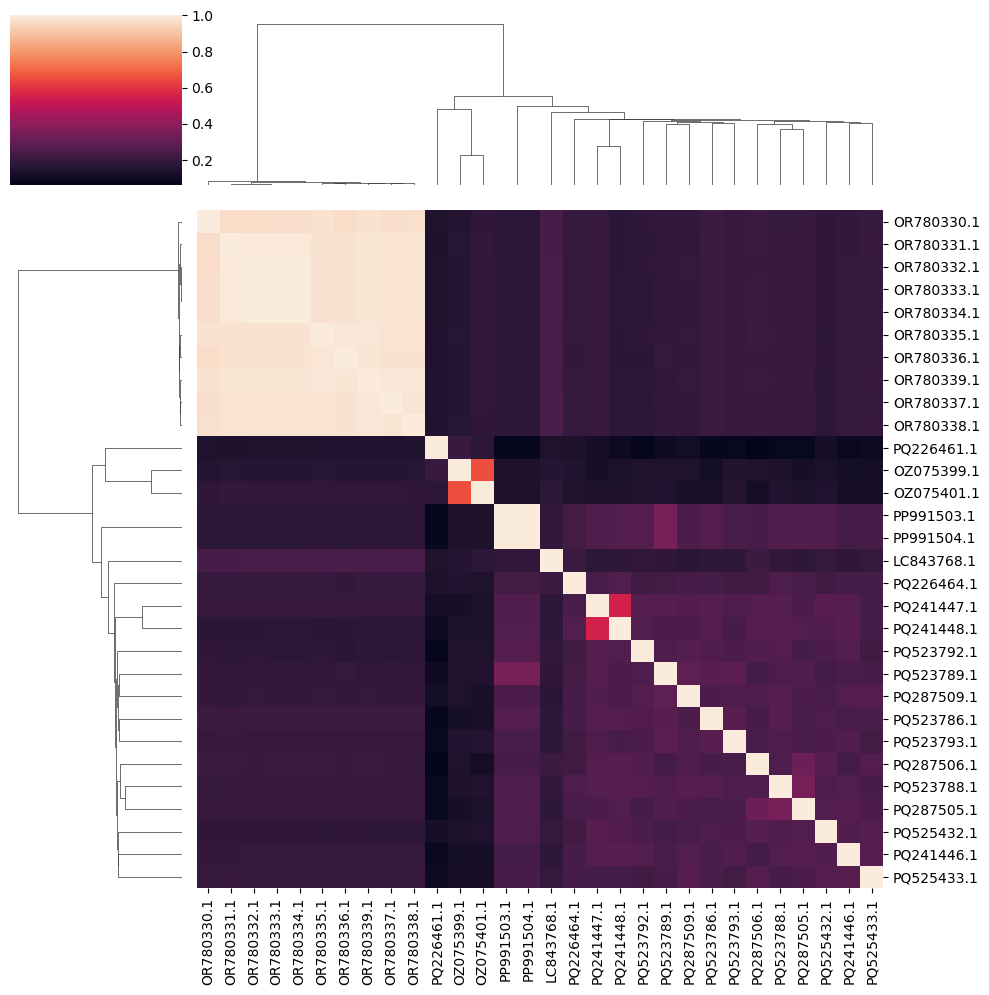

In [651]:
rvac_dataset = MetagenomeDataset("../data/combined.fasta", max_length=1000)
window = (0,10)
names = list(rvac_dataset.headers)
names = [re.match(r"^\S+", name).group() for name in names]
sim_mtx = compute_similarity_matrix(rvac_dataset.fft)
print(frobenius_norm(sim_mtx))
view_data = pd.DataFrame(sim_mtx, index=names, columns=names)
sns.clustermap(data=view_data)
plt.tight_layout()

In [630]:
rvac_dataset.graphs[4]

Data(
  x=[64],
  edge_index=[2, 256],
  edge_attr=[256, 1],
  num_nodes=64,
  kmer_map={
    0='AAA',
    1='AAC',
    2='AAG',
    3='AAT',
    4='ACA',
    5='ACC',
    6='ACG',
    7='ACT',
    8='AGA',
    9='AGC',
    10='AGG',
    11='AGT',
    12='ATA',
    13='ATC',
    14='ATG',
    15='ATT',
    16='CAA',
    17='CAC',
    18='CAG',
    19='CAT',
    20='CCA',
    21='CCC',
    22='CCG',
    23='CCT',
    24='CGA',
    25='CGC',
    26='CGG',
    27='CGT',
    28='CTA',
    29='CTC',
    30='CTG',
    31='CTT',
    32='GAA',
    33='GAC',
    34='GAG',
    35='GAT',
    36='GCA',
    37='GCC',
    38='GCG',
    39='GCT',
    40='GGA',
    41='GGC',
    42='GGG',
    43='GGT',
    44='GTA',
    45='GTC',
    46='GTG',
    47='GTT',
    48='TAA',
    49='TAC',
    50='TAG',
    51='TAT',
    52='TCA',
    53='TCC',
    54='TCG',
    55='TCT',
    56='TGA',
    57='TGC',
    58='TGG',
    59='TGT',
    60='TTA',
    61='TTC',
    62='TTG',
    63='TTT',
  }
)

Loading fasta: 0it [00:00, ?it/s]

Encoding sequences:   0%|          | 0/30 [00:00<?, ?it/s]

Building graphs:   0%|          | 0/30 [00:00<?, ?it/s]

tensor(1.9024)


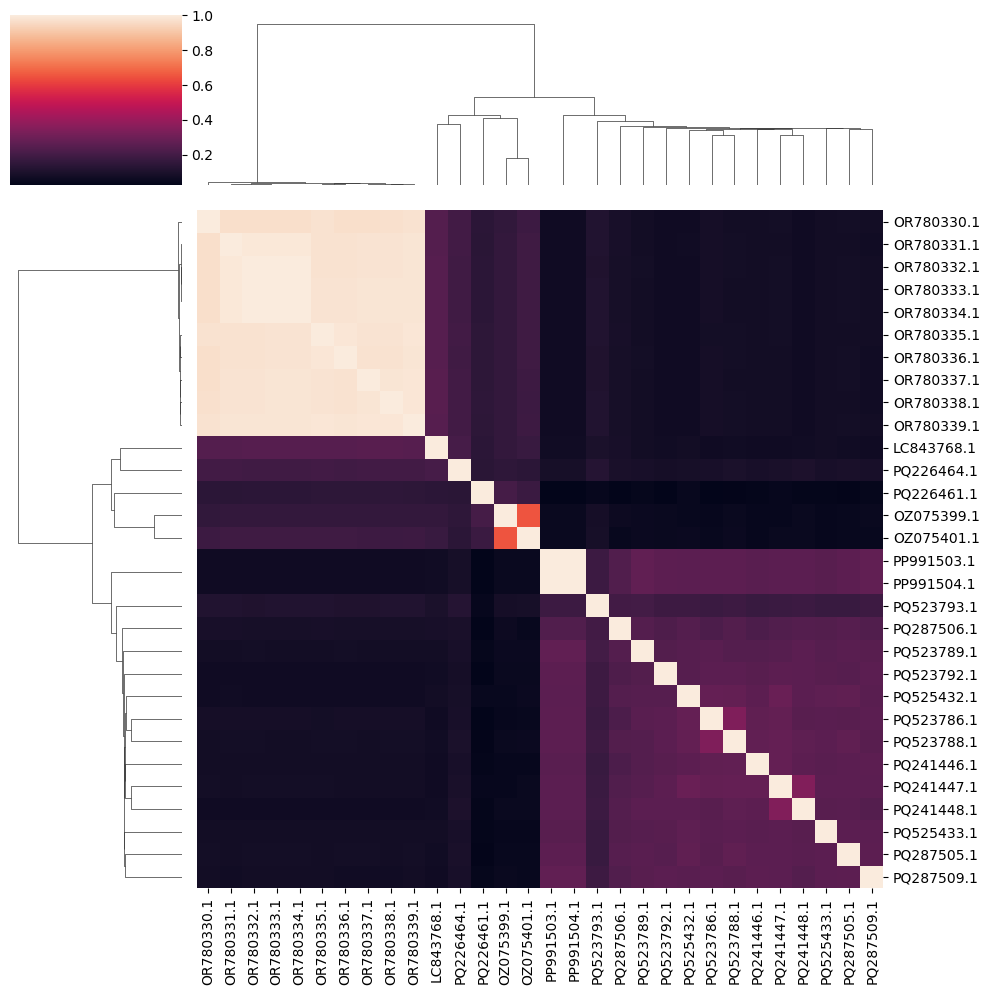

In [622]:
rvac_dataset = MetagenomeDataset("../data/combined.fasta", max_length=7000)
names = list(rvac_dataset.headers)
names = [re.match(r"^\S+", name).group() for name in names]
sim_mtx = compute_similarity_matrix(rvac_dataset.fft)
print(frobenius_norm(sim_mtx))
view_data = pd.DataFrame(sim_mtx, index=names, columns=names)
sns.clustermap(data=view_data)
plt.tight_layout()

In [528]:
rvac_dataset.headers

['PQ226461.1 Rhinovirus A isolate Uganda-UVRI-MKN2308-2023 polyprotein gene, partial cds',
 'LC843768.1 Rhinovirus A HRV-A68 gene for polyprotein, partial cds',
 'PQ241446.1 MAG: Rhinovirus A isolate GA_EHC_7124N, partial genome',
 'PQ241447.1 MAG: Rhinovirus A isolate GA_EHC_7130T, complete genome',
 'PQ241448.1 MAG: Rhinovirus A isolate GA_EHC_7129S, partial genome',
 'PQ523786.1 MAG: Rhinovirus A isolate 582762246_RNA_S87, complete genome',
 'PQ523788.1 MAG: Rhinovirus A isolate 582762209_RNA_S82, partial genome',
 'PQ523789.1 MAG: Rhinovirus A isolate 582762284_RNA_S67, partial genome',
 'PQ523793.1 MAG: Rhinovirus A isolate 582762301_RNA_S70, partial genome',
 'PQ525432.1 MAG: Rhinovirus A106 isolate Hu/US/2024/HRV A106/CA-RGDS-1192 polyprotein gene, partial cds',
 'OZ075399.1 Rhinovirus C isolate Enterovirus/Switzerland/ZH-UZH-IMV-361/2019 genome assembly, chromosome: 1',
 'OZ075401.1 Rhinovirus C isolate Enterovirus/Switzerland/ZH-UZH-IMV-390/2020 genome assembly, chromosome: 1'